# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.1636,  0.7028,  0.6029, -0.0100, -0.1709, -0.2917,  0.5149,  0.2515,
         -0.1479, -0.6324]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print('Epoch [{}/{}], Batch [{}]'.format(i + 1, n_epochs, k + 1))

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.item())

Epoch [1/5], Batch [1]
Epoch [1/5], Batch [2]
Epoch [1/5], Batch [3]
Epoch [1/5], Batch [4]
Epoch [1/5], Batch [5]
Epoch [1/5], Batch [6]
Epoch [1/5], Batch [7]
Epoch [1/5], Batch [8]
Epoch [1/5], Batch [9]
Epoch [1/5], Batch [10]
Epoch [1/5], Batch [11]
Epoch [1/5], Batch [12]
Epoch [1/5], Batch [13]
Epoch [1/5], Batch [14]
Epoch [1/5], Batch [15]
Epoch [1/5], Batch [16]
Epoch [1/5], Batch [17]
Epoch [1/5], Batch [18]
Epoch [1/5], Batch [19]
Epoch [1/5], Batch [20]
Epoch [1/5], Batch [21]
Epoch [1/5], Batch [22]
Epoch [1/5], Batch [23]
Epoch [1/5], Batch [24]
Epoch [1/5], Batch [25]
Epoch [1/5], Batch [26]
Epoch [1/5], Batch [27]
Epoch [1/5], Batch [28]
Epoch [1/5], Batch [29]
Epoch [1/5], Batch [30]
Epoch [1/5], Batch [31]
Epoch [1/5], Batch [32]
Epoch [1/5], Batch [33]
Epoch [1/5], Batch [34]
Epoch [1/5], Batch [35]
Epoch [1/5], Batch [36]
Epoch [1/5], Batch [37]
Epoch [1/5], Batch [38]
Epoch [1/5], Batch [39]
Epoch [1/5], Batch [40]
Epoch [1/5], Batch [41]
Epoch [1/5], Batch [42]
E

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.3311)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

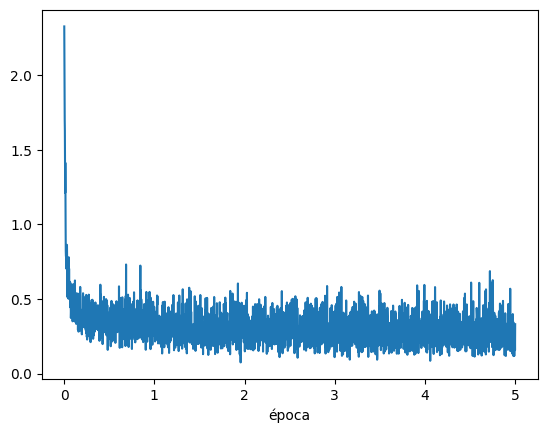

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

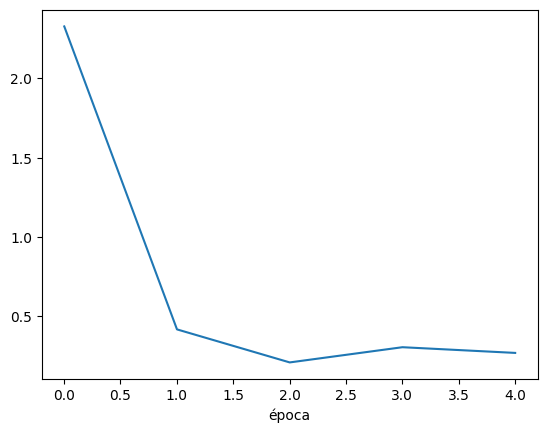

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

Número de minibatches de trenamento: 600

n_epochs = 5

600 * 5 =3.000

2. Em uma época, quantos mini-batches existem?

Número de minibatches de trenamento: 600

3. Qual é a definição de época?

Época é um laço de treinamento que percorre todas as mini-batches existentes.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

    (incluído no código acima)
    
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [12]:
if 'results' not in globals():
    results = {}

In [21]:
batch_size = 5000

# loader, modelo e otimizador
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
model = torch.nn.Linear(28*28, 10)
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
criterion = torch.nn.CrossEntropyLoss()

total_samples = len(dataset_train)

epochs = []
losses = []
total_trained_samples = 0

for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        inputs = x_train.view(-1, 28 * 28)
        outputs = model(inputs)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.item())

# Adiciona os resultados ao dicionário global
results[batch_size] = (epochs, losses)

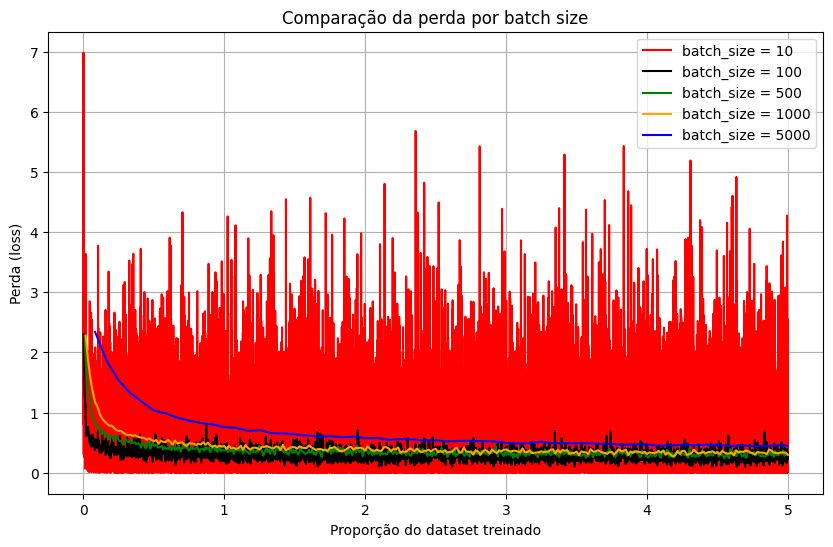

In [22]:
plt.figure(figsize=(10, 6))
colors = ['red', 'black', 'green', 'orange', 'blue', 'purple', 'brown']

for idx, (bs, (ep, loss)) in enumerate(results.items()):
    plt.plot(ep, loss, label=f'batch_size = {bs}', color=colors[idx % len(colors)])

plt.xlabel('Proporção do dataset treinado')
plt.ylabel('Perda (loss)')
plt.title('Comparação da perda por batch size')
plt.legend()
plt.grid(True)
plt.show()

## Conclusões sobre os experimentos deste notebook


A frequência e intensidade das oscilações na curva de perda diminuem conforme o batch_size aumenta.

Com batches pequenos, a curva oscila mais, refletindo o impacto do ruído nas atualizações do gradiente.

Ao aumentar o batch_size, a curva de perda torna-se mais suave, indicando que o modelo recebe atualizações mais estáveis a cada batch.

Entretanto, batches muito grandes podem demor mais para convergir e isso reforça a importância de escolher um tamanho de minibatch adequado para equilibrar velocidade de aprendizado e estabilidade.